In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [ ]:
# Read JSON file
data = pd.read_json(r'C:\Users\paolo\OneDrive\Documents\GitHub\CMSC-197-Miniproject\data\amazon_data.json')

In [ ]:
# Assign X and y
X = data['Review_Text']
y = data['Label']

In [ ]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(X)

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (21000, 35867)
y shape: (21000,)


In [53]:
# Training and test set
train_size = 0.8
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size, random_state=42)

In [54]:
# Convert labels to binary
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (16800, 35867)
y_train size: (16800,)

x_test size: (4200, 35867)
y_test size: (4200,)


In [55]:
# train
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
# evalutate
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [57]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.669047619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2115
           1       0.67      0.67      0.67      2085

    accuracy                           0.67      4200
   macro avg       0.67      0.67      0.67      4200
weighted avg       0.67      0.67      0.67      4200



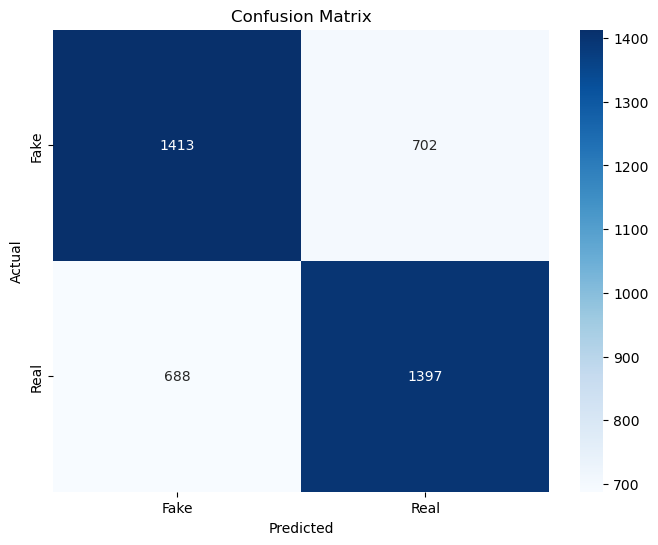

In [58]:
# cnfusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
cv_scores = cross_val_score(model, x, y, cv=10)

print(f"10-fold Cross Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

10-fold Cross Validation Accuracy: 0.6427 ± 0.0298
